# Experimentacion

In [1]:
# -*- coding: utf-8 -*-

import numpy as np

def generarCasoUniforme(n, minimo=0, maximo=10):
    caso = []
    caso.append(str(n))
    for i in range(1,n+1):
        costos_i = []
        for j in range(i):
            c_j_i = np.random.randint(minimo, maximo+1)
            costos_i.append(c_j_i)
            costos_i_str = " ".join(str(k) for k in costos_i)
        caso.append(costos_i_str)

    return caso

def generarCasoNormal(n, mu=5, sigma=1):
    caso = []
    caso.append(str(n))
    for i in range(1,n+1):
        costos_i = []
        for j in range(i):
            c_j_i = int(np.random.normal(mu, sigma))
            c_j_i = max(c_j_i, 0)
            costos_i.append(c_j_i)
            costos_i_str = " ".join(str(k) for k in costos_i)
        caso.append(costos_i_str)

    return caso

def generarEntradaUniforme(n, minimo=0, maximo=10, archivo="output"):
    with open(archivo, 'w') as entrada:
        for i in range(50):
            caso = generarCasoUniforme(n, minimo, maximo)
            for j in caso:
                entrada.write(j + '\n')
        entrada.write("0\n")

def generarEntradaNormal(n, mu=5, sigma=1, archivo="output"):
    with open(archivo, 'w') as entrada:
        for i in range(30):
            caso = generarCasoNormal(n, mu, sigma)
            for j in caso:
                entrada.write(j + '\n')
        entrada.write("0 \n")


def generarEntradasHasta(n):
    trabajos = 50
    while(trabajos <= n):        
        generarEntradaUniforme(trabajos, 1, 100, "tests/uniforme_%i.in" % (trabajos))
        generarEntradaNormal(trabajos, 10, 5, "tests/normal_10_5_%i.in" % (trabajos))
        generarEntradaNormal(trabajos, 40, 5, "tests/normal_40_5_%i.in" % (trabajos))
        generarEntradaNormal(trabajos, 80, 5, "tests/normal_80_5_%i.in" % (trabajos))
        generarEntradaNormal(trabajos, 160, 5, "tests/normal_160_5_%i.in" % (trabajos))
        generarEntradaNormal(trabajos, 320, 5, "tests/normal_320_5_%i.in" % (trabajos))
        generarEntradaNormal(trabajos, 40, 0, "tests/normal_40_0_%i.in" % (trabajos))
        generarEntradaNormal(trabajos, 40, 10, "tests/normal_40_10_%i.in" % (trabajos))
        generarEntradaNormal(trabajos, 40, 20, "tests/normal_40_20_%i.in" % (trabajos))
        generarEntradaNormal(trabajos, 40, 40, "tests/normal_40_40_%i.in" % (trabajos))
        trabajos = trabajos + 20


# generarEntradasHasta(350)

In [2]:
def generarEntradaNormalHasta(n, mu=5, sigma=1, archivo="output"):
    with open(archivo, 'w') as entrada:
        for k in range(5, n+1):
            for i in range(50):
                caso = generarCasoNormal(k, mu, sigma)
                for j in caso:
                    entrada.write(j + '\n')
        entrada.write("0 \n")

In [3]:
generarEntradaNormalHasta(50, 160, 5, "tests/creciente.test-in")

In [10]:
!make expe

In [5]:
# -*- coding: utf-8 -*-
import pandas as pd
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random

In [11]:
dfBottom = pd.read_csv('experimentacion/bottomup_creciente.stderr', delimiter=';')
dfTop = pd.read_csv('experimentacion/topdown_creciente.stderr', delimiter=';')

In [12]:
dfBottom = dfBottom.groupby('Cantidad de trabajos').mean()
dfTop = dfTop.groupby('Cantidad de trabajos').mean()

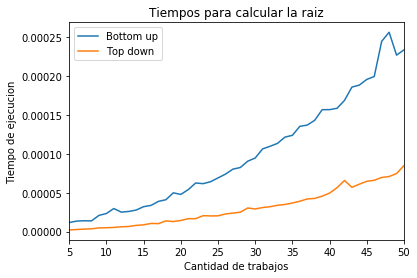

In [13]:
df = pd.DataFrame({'Bottom up': dfBottom['Tiempo de ejecucion'],
                  'Top down': dfTop['Tiempo de ejecucion']})

ax = df.plot(logy=False)
ax.set_ylabel("Tiempo de ejecucion")
ax.set_xlabel("Cantidad de trabajos")

plt.title("Tiempos para calcular la raiz")
plt.show()

In [14]:
dfComp = pd.DataFrame()
dfComp['Complejidad n^2'] = [n**2 for n in dfBottom.index.values]
dfComp['Tiempo de ejecucion bottom up'] =  dfBottom['Tiempo de ejecucion']
dfComp['Tiempo de ejecucion top down'] =  dfTop['Tiempo de ejecucion']

plt.clf()
correlation = dfComp.corr()
correlation

,Complejidad n^2,Tiempo de ejecucion bottom up,Tiempo de ejecucion top down
Complejidad n^2,1.000000,0.998566,0.992800
Tiempo de ejecucion bottom up,0.998566,1.000000,0.989619
Tiempo de ejecucion top down,0.992800,0.989619,1.000000


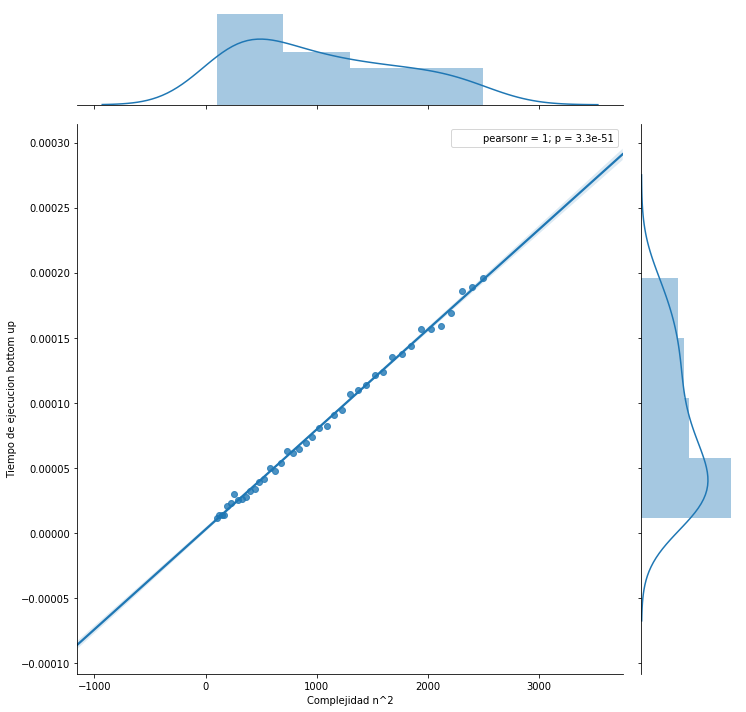

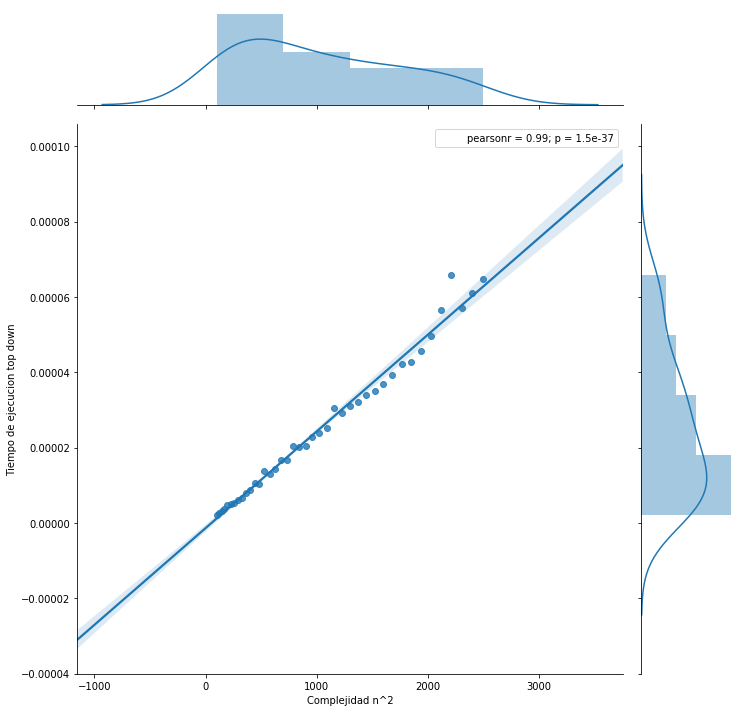

In [15]:
sns.jointplot(dfComp['Complejidad n^2'], dfComp['Tiempo de ejecucion bottom up'], kind="reg", size=10)
sns.jointplot(dfComp['Complejidad n^2'], dfComp['Tiempo de ejecucion top down'], kind="reg", size=10)


plt.show()